In [1]:
# Playing with models

from qiskit.aqua.algorithms import VQC
from qiskit.aqua.components.optimizers import SPSA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from qiskit.ml.datasets import ad_hoc_data, wine

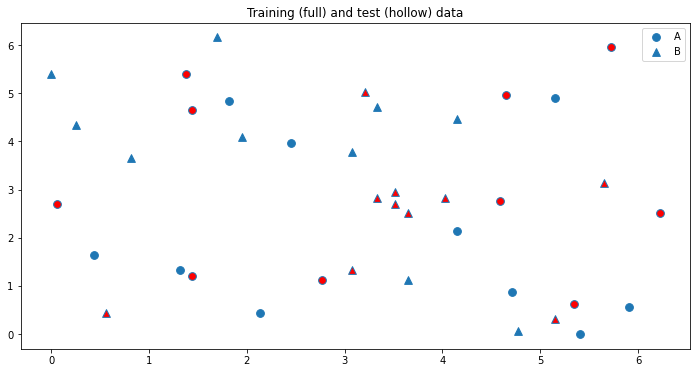

In [7]:
# Data to play with
# ad_hoc_data - returns ad hoc dataset - ad_hoc_data(training_size, test_size, n, gap, plot_data=False)
# sample_ad_hoc_data - returns sample ad hoc data
# breast_cancer - returns breast cancer dataset
# digits - returns digits dataset
# gaussian - returns gaussian dataset
# iris - returns iris dataset
# wine - returns wine dataset - wine(training_size, test_size, n, plot_data=False)

_, training_data, test_data, _ = ad_hoc_data(10, 10, 2, 0.2)

markers = ['o', '^']
plt.figure(figsize=(12,6))
plt.title('Training (full) and test (hollow) data')
for marker, (label, data) in zip(markers, training_data.items()):
    plt.scatter(data[:,0], data[:,1], color='tab:blue', label=label, s=60, marker=marker)
for marker, (label, data) in zip(markers, test_data.items()):
    plt.scatter(data[:,0], data[:,1], facecolor='red', edgecolor='tab:blue', s=60, marker=marker)
plt.legend(loc='best');

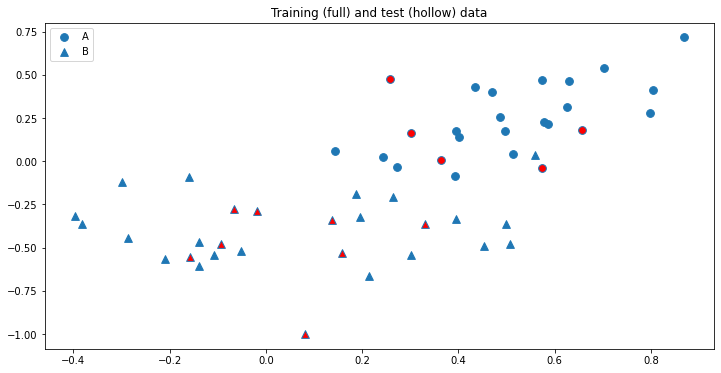

In [6]:
_, wine_training_data, wine_data, _ = wine(20, 20, 3)

markers = ['o', '^']
plt.figure(figsize=(12,6))
plt.title('Training (full) and test (hollow) data')
for marker, (label, data) in zip(markers, wine_training_data.items()):
    plt.scatter(data[:,0], data[:,1], color='tab:blue', label=label, s=60, marker=marker)
for marker, (label, data) in zip(markers, wine_data.items()):
    plt.scatter(data[:,0], data[:,1], facecolor='red', edgecolor='tab:blue', s=60, marker=marker)
plt.legend(loc='best');

In [8]:
# Choose which trainint data
test_data = wine_data
training_data = wine_training_data

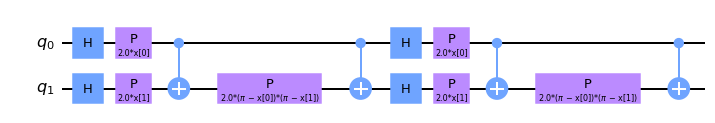

In [9]:
from qiskit.circuit.library.data_preparation import ZZFeatureMap  # can also drop .data_preparation

data_preparation = ZZFeatureMap(2)
data_preparation.draw(output='mpl')

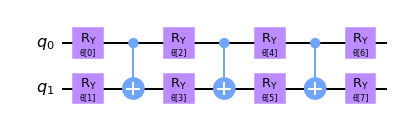

In [10]:
from qiskit.circuit.library.n_local import RealAmplitudes  # can also drop .n_local

classifier = RealAmplitudes(2)
classifier.draw(output='mpl')

In [11]:
optimizer = SPSA(max_trials=200)
vqc = VQC(optimizer, data_preparation, classifier, training_data)

/Users/sergiogago/opt/anaconda3/envs/qiskit24/lib/python3.8/site-packages/qiskit/aqua/components/optimizers/spsa.py:93: DeprecationWarning: The max_trials parameter is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use maxiter instead.
  warnings.warn('The max_trials parameter is deprecated as of '


In [13]:
from qiskit import Aer
from qiskit.aqua import QuantumInstance
backend = Aer.get_backend('qasm_simulator')

result = vqc.run(backend)
print('Loss:', result['training_loss'])

Loss: 1.0578242933814879


In [ ]:
points_a = test_data['A']
points_b = test_data['B']
_, predicted_a = vqc.predict(points_a)
_, predicted_b = vqc.predict(points_b)

print('Score:', sum(predicted_a == 0) + sum(predicted_b == 1), '/', (len(predicted_a) + len(predicted_b)))

Score: 4 / 7


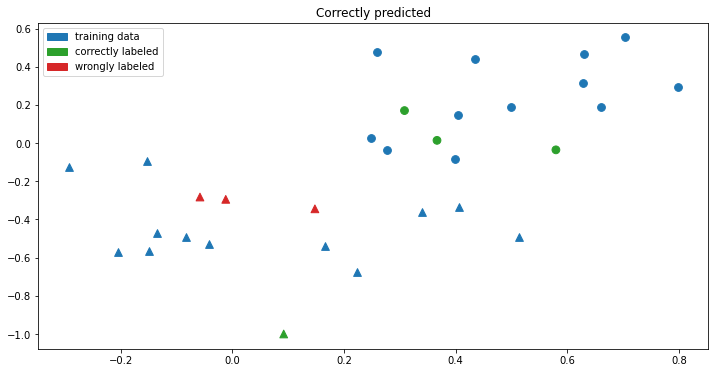

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Correctly predicted')
plt.scatter(points_a[:,0], points_a[:,1], s=60, marker='o',
            color=['tab:green' if label == 0 else 'tab:red' for label in predicted_a])
plt.scatter(points_b[:,0], points_b[:,1], s=60, marker='^',
            color=['tab:green' if label == 1 else 'tab:red' for label in predicted_b])
for marker, (label, data) in zip(markers, training_data.items()):
    plt.scatter(data[:,0], data[:,1], color='tab:blue', label=label, s=60, marker=marker)

train = mpatches.Patch(color='tab:blue', label='training data')
correct = mpatches.Patch(color='tab:green', label='correctly labeled')
wrong = mpatches.Patch(color='tab:red', label='wrongly labeled')
plt.legend(handles=[train, correct, wrong])